# AVANCE II  PROYECTO INTEGRADOR

### Grupo: 001, Lunes-Miércoles-Viernes/6:00pm-7:00pm
### Equipo 7
    - Josias de la Cruz Cruz               1750176
    - Carlos Abraham Murillo Valdés        1488911
    - Luisa Rubí Villegas Rincón           1752574

## Base de datos: Novel Corona Virus 2019 Dataset

### Descripción de la base de datos
La base de datos con la que se va a estar trabajando contiene información general a nivel mundial acerca del virus COVID-19.
Trabajaremos en esta base de datos con el objetivo de determinar distintas probabilidades que puede generar este virus.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

### Descripción de las columnas.

    ● Sno - Número de serie
    ● Date - Fecha y hora de la observación en MM / DD / AAAA HH: MM: SS.
    ● Province / State - Provincia o estado de la observación (podría estar vacío cuando falta).
    ● Country - País de observación.
    ● Last Update - Hora en UTC en la que se actualiza la fila para la provincia o país en cuestión.
    ● Confirmed - Número acumulado de casos confirmados hasta esa fecha
    ● Deaths - Número acumulado de muertes hasta esa fecha.
    ● Recovered - Número acumulado de casos recuperados hasta esa fecha. 

A continuación visualizaremos los primeros 10 elementos de nuestra base de datos (la base de datos contiene miles de elementos). 

In [3]:
covid= pd.read_csv("covid_19_data.csv") 
covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


Mostramos los tipos de datos que maneja cada una de nuestras variables

In [4]:
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Ahora, verificamos si algunas de nustras variables contienen datos nulos. Resultado True: indica que si contiene valores nulos, False: indica que no contiene valores nulos.

In [5]:
covid.isnull().any()

SNo                False
ObservationDate    False
Province/State      True
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

## Justificación de los datos

La principal característica que nos llamó la atención de esta base de datos fue que utiliza datos discretos, lo cual nos fue fácil de entender su significado. Estos datos representan las frecuencias o las incidencias de estado en la que una persona contagiada de coronavirus puede estar. También podemos observar su ubicación geográfica y la hora de registro.

Los principales beneficio de trabajar con datos discretos, es que, nos es sencillo visualizar las frecuencias de los estados posibles de una persona de covid 19, considerándola como nuestra unidad de estudio. Una persona es = 1 no es posible que una persona valga ½. Bajo esa premisa trabajaremos en este proyecto.


### Preguntas de interés

Nuestras preguntas concretas son las que se mencionan a continuación, pero a lo largo del proyecto existe la posibilidad de poder agregar más.

##### ¿Cual es la probabilidad de contagio, muerte y recuperación de cierta área geográfica?

##### ¿Cuáles son los pesos de las probabilidades de que presenten ciertos conjuntos de estados a la vez?.

## Limpieza de datos

En nuestro caso la base de datos no tendrá modificación alguna en cuanto a eliminar variables innecesarias, ya que las varibles que contiene sirven para realizar los procedimientos que se realizarán más adelante.

#### En las suguientes líneas de código se cargarán las bases de datos en la cuales podremos crear clases de los casos acumulados del estado (Confirmed, Deaths, Recovered) que puedan presentar las personas ante el virus.

In [84]:
covid_confirmed = pd.read_csv("time_series_covid_19_confirmed.csv") 
covid_confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,607,665,714,784,840,906,933,996,1026,1092
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,446,467,475,494,518,539,548,562,584,609
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,638,646,659,673,673,696,704,713,717,717
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,24,24,24,24
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,21,23,23,23,23,23,23,23,23,23
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1013,1039,1067,1111,1159,1201,1248,1291,1339,1401
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,103,102,103,103,103,103,103,103,103,103
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2857,2863,2870,2886,2897,2926,2926,2926,2926,2926


Base de datos con casos confirmados acumulativos de covid 19 por fecha a nivel mundial (01/22/2020 - 04/21/2020).

In [122]:
TotalConfirmed = covid_confirmed['4/21/20'].sum()
print(TotalConfirmed)

2561043


Variable que respresenta el acumulativo total de casos confirmados de covid 19 hasta la fecha a nivel mundial (01/22/2020 - 04/21/2020).

In [36]:
covid_deaths = pd.read_csv("time_series_covid_19_deaths.csv") 
covid_deaths.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18,21,23,25,30,30,30,33,36,36
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,24,25,26,26,26,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,293,313,326,336,348,364,367,375,384,392
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,29,31,33,33,35,35,36,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,2,2,2,2,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,90,97,102,111,115,123,129,132,136,147
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,13,14,16,17,18,19,20,20,22,24
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,2,2,2,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,24,25,25,25,25,26,26,26,26,26


Base de datos con casos de fallecidos acumulativos de covid 19 por fecha a nivel mundial (01/22/2020 - 04/21/2020).

In [101]:
TotalDeaths = covid_deaths['4/21/20'].sum()
print(TotalDeaths)

176983


Variable que respresenta el acumulativo total de casos fallecidos de covid 19 hasta la fecha a nivel mundial (01/22/2020 - 04/21/2020).

In [37]:
covid_recovered = pd.read_csv("time_series_covid_19_recovered.csv") 
covid_recovered.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,40,43,54,99,112,131,135,150
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,217,232,248,251,277,283,302,314,327,345
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,591,601,691,708,783,846,894,1047,1099,1152
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,128,128,128,169,169,191,205,235,248,282
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,5,5,5,6,6,6,6
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,3,3,3,3,3,3,3,7
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,468,515,559,596,631,666,685,709,737,840
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,197,211,265,297,358,402,523,545,580,609
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,59,59,72,72,82,81,88,88,88,88
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,4,4,4,4,4,1379,1379,1379,1379,1379


Base de datos con casos recuperados acumulativos de covid 19 por fecha a nivel mundial (01/22/2020 - 04/21/2020).

In [102]:
TotalRecovered = covid_recovered['4/21/20'].sum()
print(TotalRecovered)

679819


Variable que respresenta el acumulativo total de casos recuperados de covid 19 hasta la fecha a nivel mundial (01/22/2020 - 04/21/2020).

## Estadística de los datos

Empezaremos a trabajar con nuestros datos de manera que podamos responder las preguntas que nos hemos planteado anteriormente, el enfoque de este proyecto será de tipo predictivo.

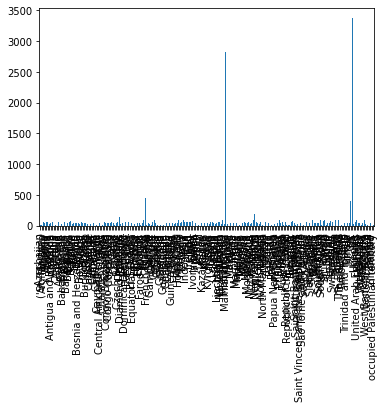

In [8]:
covid['Country/Region'].value_counts().sort_index().plot.bar()

Esta gráfica representa la cantidad de veces que se ha repetido el nombre del país (Region/Country) que ha presentados al menos uno de los tres estados (Confirmed, Deaths, Recovered) posibles de una persona relacionada con el covid 19 en la base de datos covid. Esto basado en el tiempo transcurrido de la fecha 01/22/2020 hasta el 04/21/2020.

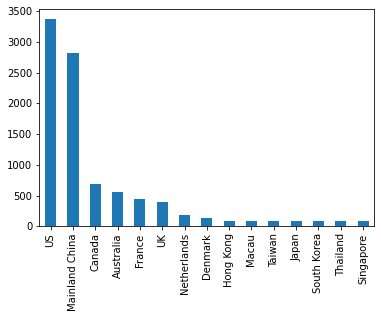

In [9]:
covid['Country/Region'].value_counts().head(15).plot.bar()

Esta gráfica representa los 15 países con mayor con mayor incidencia diaria.

### Creación de la formula para obtener la probabilidad de un país de los estados (confirmed, deaths, recovered) posbiles de covid 19.

In [131]:
def probabilidad (total_mundial, total_regional):
    resultado = (total_regional / total_mundial)
    return resultado

## Creación de las clases de interes de acumulados de los estado Confirmed, Deaths, Recovered en base a la región US respecto al tiempo inicial hasta la actual (01/22/2020 hasta el 04/21/2020).

In [92]:
clase_US_confirmed = covid_confirmed[covid_confirmed['Country/Region']=='US']
clase_US_confirmed.to_csv('Clase_US_Confirmed.csv', index=False)

In [93]:
clase_US_deaths = covid_deaths[covid_deaths['Country/Region']=='US']
clase_US_deaths.to_csv('Clase_US_Deaths.csv', index=False)

In [94]:
clase_US_recovered = covid_recovered[covid_recovered['Country/Region']=='US']
clase_US_recovered.to_csv('Clase_US_Recovered.csv', index=False)

### Análisis de las clases clase_US perteneciente a 'Country/Region' (país) de Estados Unidos de América

#### EN clase_US_confirmed

In [96]:
Cs_us_confirmed = pd.read_csv("Clase_US_Confirmed.csv") 
Cs_us_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,555313,580619,607670,636350,667592,699706,732197,759086,784326,823786


In [107]:
TotalConfirmed_us = Cs_us_confirmed['4/21/20'].sum()
print (TotalConfirmed_us)

823786


variable que representa el total de confirmados de covid 19 hasta la última fecha actual 4/21/20.

##### En la siguiente operación se obtendrá la probabilidad de casos confirmados de US a nivel mundial.

In [133]:
probabilidad_us_confirmed = probabilidad(TotalConfirmed, TotalConfirmed_us)

print("Total Mundial Confirmados: ",TotalConfirmed)
print("\nTotal US Confirmados: ",TotalConfirmed_us)
print("\nProbabilidad de confirmados: ", probabilidad_us_confirmed)

Total Mundial Confirmados:  2561043

Total US Confirmados:  823786

Probabilidad de confirmados:  0.32166035478514027


#### Los resultados los podemos interpretar de la siguiente manera, que la probabilidad de que una persona contagiada de covid 19 sea de la región de US es de 0.32% a nivel mundial.

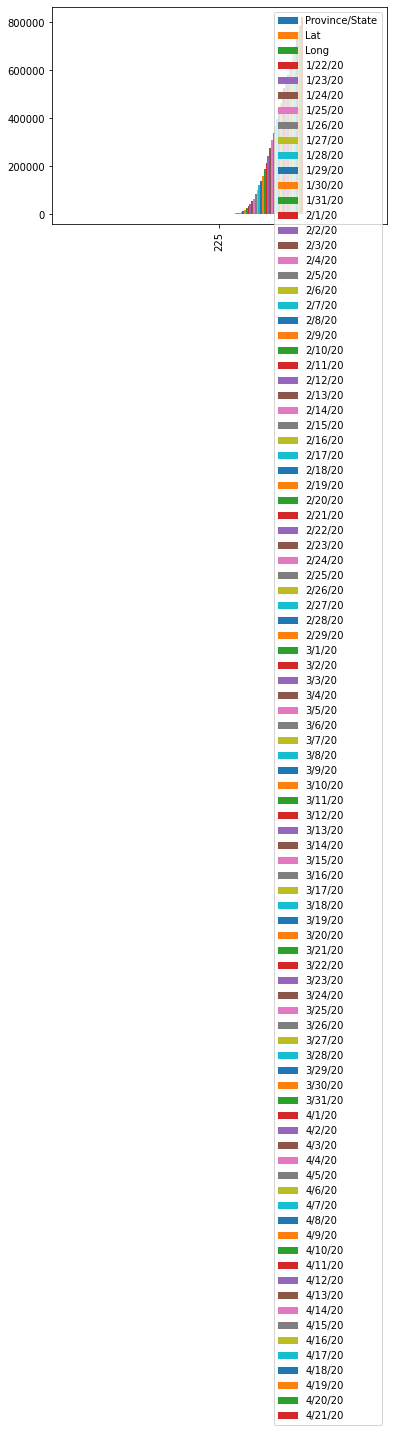

In [82]:
clase_US_confirmed.sort_index().plot.bar()

Está gráfica nos muestra la información de los casos confirmados de covid 19 en US día tras día a partir de la fecha 01/22/2020 hasta el 04/21/2020. Como se puede observar en la gráfica los resultados van de forma creciente por lo que los casos en ningin momento decrecieron.

#### EN clase_US_deaths

In [134]:
Cs_us_deaths = pd.read_csv("Clase_US_Deaths.csv") 
Cs_us_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,22019,23528,25831,28325,32916,36773,38664,40661,42094,44845


In [135]:
TotalDeaths_us = Cs_us_deaths['4/21/20'].sum()
print (TotalDeaths_us)

44845


variable que representa el total de fallecidos de covid 19 hasta la última fecha actual 4/21/20.

##### En la siguiente operación se obtendrá la probabilidad de casos fallecidos de US a nivel mundial.

In [136]:
probabilidad_us_deaths = probabilidad(TotalDeaths, TotalDeaths_us)

print("Total Mundial Fallecidos: ",TotalDeaths)
print("\nTotal US Fallecidos: ",TotalDeaths_us)
print("\nProbabilidad de Fallecidos: ", probabilidad_us_deaths)

Total Mundial Fallecidos:  176983

Total US Fallecidos:  44845

Probabilidad de Fallecidos:  0.2533859184215433


#### Los resultados los podemos interpretar de la siguiente manera, que la probabilidad de que una persona haya fallecido de covid 19 sea de la región de US es de 0.25% a nivel mundial.

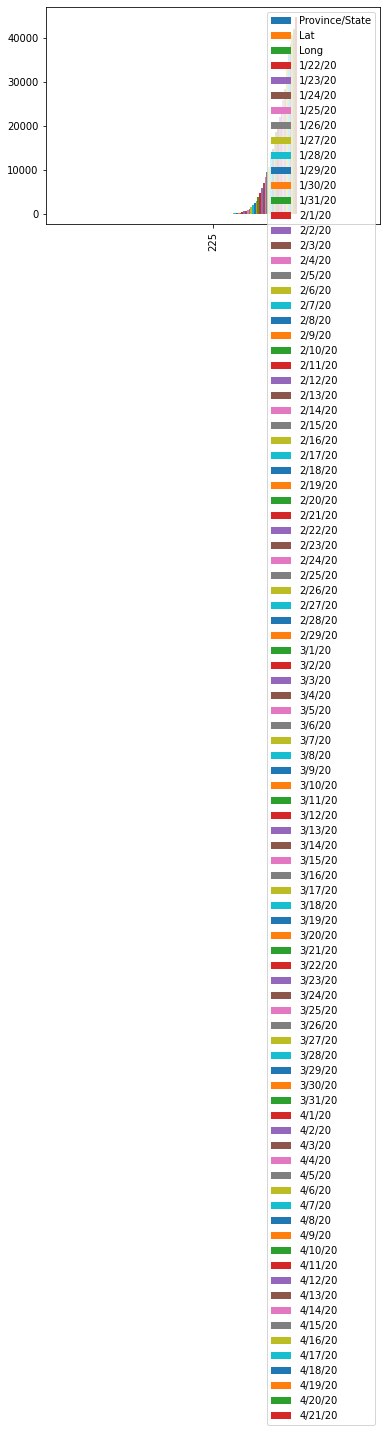

In [137]:
clase_US_deaths.sort_index().plot.bar()

Está gráfica nos muestra la información de los casos fallecidos por covid 19 en US día tras día a partir de la fecha 01/22/2020 hasta el 04/21/2020. Como se puede observar en la gráfica los resultados van de forma creciente por lo que los casos en ningin momento decrecieron.

#### EN clase_US_recovered

In [138]:
Cs_us_recovered = pd.read_csv("Clase_US_Recovered.csv") 
Cs_us_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,32988,43482,47763,52096,54703,58545,64840,70337,72329,75204


In [139]:
TotalRecovered_us = Cs_us_recovered['4/21/20'].sum()
print (TotalRecovered_us)

75204


variable que representa el total de recuperados de covid 19 hasta la última fecha actual 4/21/20.

##### En la siguiente operación se obtendrá la probabilidad de casos recuperados de US a nivel mundial.

In [140]:
probabilidad_us_recovered = probabilidad(TotalRecovered, TotalRecovered_us)

print("Total Mundial Recuperados: ",TotalRecovered)
print("\nTotal US Recuperados: ",TotalRecovered_us)
print("\nProbabilidad de Recuperados: ", probabilidad_us_recovered)

Total Mundial Recuperados:  679819

Total US Recuperados:  75204

Probabilidad de Recuperados:  0.1106235630366318


#### Los resultados los podemos interpretar de la siguiente manera, que la probabilidad de que una persona haya sido recuperada de covid 19 sea de la región de US es de 0.11% a nivel mundial.

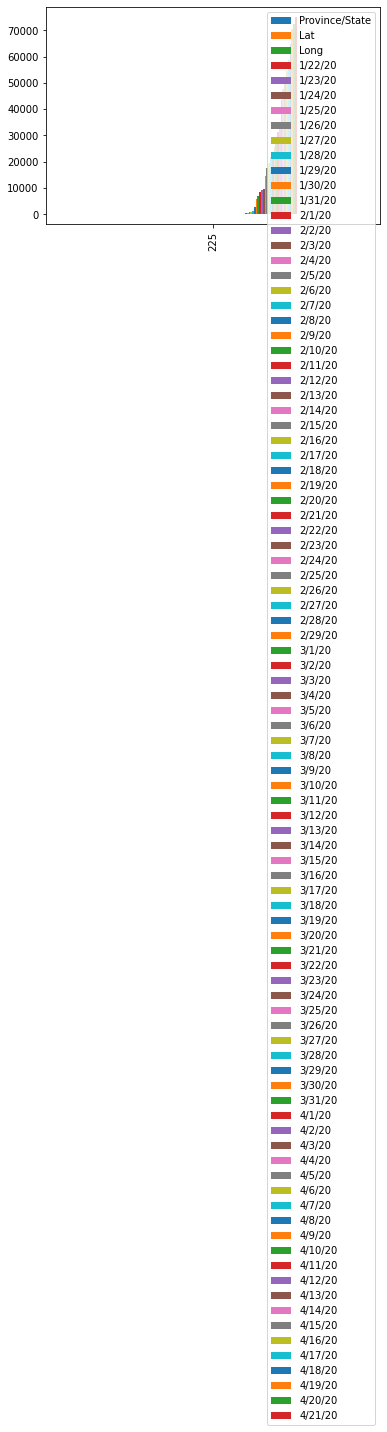

In [141]:
clase_US_recovered.sort_index().plot.bar()

Está gráfica nos muestra la información de los casos recuperados de covid 19 en US día tras día a partir de la fecha 01/22/2020 hasta el 04/21/2020. Como se puede observar en la gráfica los resultados van de forma creciente por lo que los casos recuperados van en aumento y favoreciendo a la región.

## Creación de las clases de interes de acumulados de los estado Confirmed, Deaths, Recovered en base a la región China respecto al tiempo inicial hasta la actual (01/22/2020 hasta el 04/21/2020).

In [146]:
clase_CH_confirmed = covid_confirmed[covid_confirmed['Country/Region']=='China']
clase_CH_confirmed.to_csv('Clase_CH_Confirmed.csv', index=False)

In [147]:
clase_CH_deaths = covid_deaths[covid_deaths['Country/Region']=='China']
clase_CH_deaths.to_csv('Clase_CH_Deaths.csv', index=False)

In [148]:
clase_CH_recovered = covid_recovered[covid_recovered['Country/Region']=='China']
clase_CH_recovered.to_csv('Clase_CH_Recovered.csv', index=False)

### Análisis de las clases clase_CH perteneciente a 'Country/Region' (país) de China

#### EN clase_CH_confirmed

In [153]:
Cs_ch_confirmed = pd.read_csv("Clase_CH_Confirmed.csv") 
Cs_ch_confirmed.head(33)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
1,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,589,589,589,590,593,593,593,593,593,593
2,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,579
3,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,352,352,353,353,353,354,355,355,355,355
4,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,139,139,139,139,139,139,139,139,139,139
5,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1552,1555,1564,1566,1571,1577,1579,1580,1581,1582
6,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
7,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,147,147,147
8,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
9,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,327,327,327,327,328,328,328,328,328,328


In [154]:
TotalConfirmed_ch = Cs_ch_confirmed['4/21/20'].sum()
print (TotalConfirmed_ch)

83853


variable que representa el total de confirmados de covid 19 hasta la última fecha actual 4/21/20.

##### En la siguiente operación se obtendrá la probabilidad de casos confirmados de China a nivel mundial.

In [156]:
probabilidad_ch_confirmed = probabilidad(TotalConfirmed, TotalConfirmed_ch)

print("Total Mundial Confirmados: ",TotalConfirmed)
print("\nTotal China Confirmados: ",TotalConfirmed_ch)
print("\nProbabilidad de confirmados: ", probabilidad_ch_confirmed)

Total Mundial Confirmados:  2561043

Total China Confirmados:  83853

Probabilidad de confirmados:  0.03274173842454031


#### Los resultados los podemos interpretar de la siguiente manera, que la probabilidad de que una persona contagiada de covid 19 sea de la región de China es de 0.032% a nivel mundial.

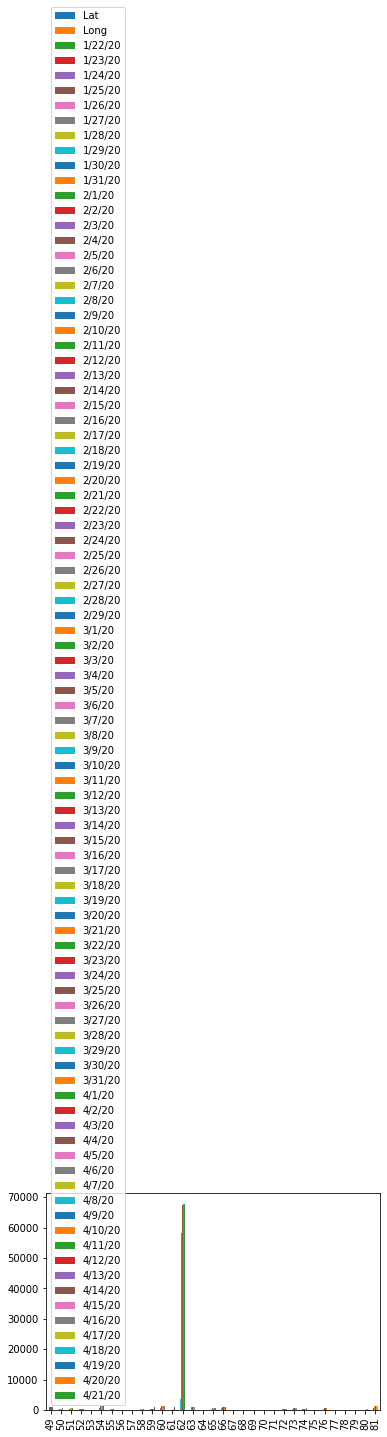

In [157]:
clase_CH_confirmed.sort_index().plot.bar()

Está gráfica nos muestra la información de los casos recuperados de covid 19 en China día tras día por ciudad a partir de la fecha 01/22/2020 hasta el 04/21/2020. Como se puede observar en la gráfica cada barra representa una ciudad los resultados van de forma creciente por lo que los casos recuperados van en aumento y favoreciendo a la región.

#### EN clase_CH_deaths

In [174]:
Cs_ch_deaths = pd.read_csv("Clase_CH_Deaths.csv") 
Cs_ch_deaths.head(33)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,Anhui,China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,8
2,Chongqing,China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,China,37.8099,101.0583,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,Guangdong,China,23.3417,113.4244,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
6,Guangxi,China,23.8298,108.7881,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
7,Guizhou,China,26.8154,106.8748,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
8,Hainan,China,19.1959,109.7453,0,0,0,0,0,1,...,6,6,6,6,6,6,6,6,6,6
9,Hebei,China,39.5490,116.1306,0,1,1,1,1,1,...,6,6,6,6,6,6,6,6,6,6


In [175]:
TotalDeaths_ch = Cs_ch_deaths['4/21/20'].sum()
print (TotalDeaths_ch)

4636


variable que representa el total de fallecidos de covid 19 hasta la última fecha actual 4/21/20.

##### En la siguiente operación se obtendrá la probabilidad de casos fallecidos de China a nivel mundial.

In [176]:
probabilidad_ch_deaths = probabilidad(TotalDeaths, TotalDeaths_ch)

print("Total Mundial Fallecidos: ",TotalDeaths)
print("\nTotal China Fallecidos: ",TotalDeaths_ch)
print("\nProbabilidad de Fallecidos: ", probabilidad_ch_deaths)

Total Mundial Fallecidos:  176983

Total China Fallecidos:  4636

Probabilidad de Fallecidos:  0.026194606261618347


#### Los resultados los podemos interpretar de la siguiente manera, que la probabilidad de que una persona haya fallecido de covid 19 sea de la región de China es de 0.026% a nivel mundial.

#### EN clase_CH_recovered

In [177]:
Cs_ch_recovered = pd.read_csv("Clase_CH_Recovered.csv") 
Cs_ch_recovered.head(33)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20
0,Anhui,China,31.8257,117.2264,0,0,0,0,0,0,...,984,984,984,984,984,984,984,984,984,984
1,Beijing,China,40.1824,116.4142,0,0,1,2,2,2,...,479,484,491,495,503,509,509,510,514,516
2,Chongqing,China,30.0572,107.8740,0,0,0,0,0,0,...,570,570,570,570,570,570,570,570,570,570
3,Fujian,China,26.0789,117.9874,0,0,0,0,0,0,...,321,325,329,331,333,334,336,339,339,341
4,Gansu,China,37.8099,101.0583,0,0,0,0,0,0,...,135,135,136,136,137,137,137,137,137,137
5,Guangdong,China,23.3417,113.4244,0,2,2,2,2,4,...,1443,1454,1458,1462,1471,1475,1482,1490,1494,1501
6,Guangxi,China,23.8298,108.7881,0,0,0,0,0,0,...,252,252,252,252,252,252,252,252,252,252
7,Guizhou,China,26.8154,106.8748,0,0,0,0,0,0,...,144,144,144,144,144,144,144,145,145,145
8,Hainan,China,19.1959,109.7453,0,0,0,0,0,0,...,162,162,162,162,162,162,162,162,162,162
9,Hebei,China,39.5490,116.1306,0,0,0,0,0,0,...,313,313,314,314,315,316,316,316,317,317


In [178]:
TotalRecovered_ch = Cs_ch_recovered['4/21/20'].sum()
print (TotalRecovered_ch)

77799


variable que representa el total de recuperados de covid 19 hasta la última fecha actual 4/21/20.

##### En la siguiente operación se obtendrá la probabilidad de casos recuperados de China a nivel mundial.

In [180]:
probabilidad_ch_recovered = probabilidad(TotalRecovered, TotalRecovered_ch)

print("Total Mundial Recuperados: ",TotalRecovered)
print("\nTotal China Recuperados: ",TotalRecovered_ch)
print("\nProbabilidad de Recuperados: ", probabilidad_ch_recovered)

Total Mundial Recuperados:  679819

Total China Recuperados:  77799

Probabilidad de Recuperados:  0.11444075555405189


#### Los resultados los podemos interpretar de la siguiente manera, que la probabilidad de que una persona haya sido recuperada de covid 19 sea de la región de China es de 0.11% a nivel mundial.